# Project Title: Electric Vehicle Adoption and Policy Insights: Washington State EV Landscape Analysis

# Project Overview
This project analyzes electric vehicle (EV) registrations in Washington State, using a dataset of over 270,000 vehicles. It explores market trends, manufacturer and model dominance, geographic adoption patterns, policy alignment, and electric range reporting, providing actionable insights for stakeholders interested in EV market dynamics, infrastructure planning, and policy impact. Visualizations are created with Pandas, Matplotlib, and Seaborn to illustrate trends clearly and effectively.
# Objectives
- Understand EV adoption trends over time, distinguishing between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).
- Identify leading manufacturers and top models, highlighting market concentration and competitive dynamics.
- Analyze geographic distribution, including county- and city-level adoption patterns, to reveal urban dominance and regional disparities.
- Examine policy alignment, particularly Clean Alternative Fuel Vehicle (CAFV) eligibility across EV types.
- Assess electric range reporting quality and trends over model years, highlighting data completeness and reliability.
- Provide actionable insights for stakeholders including policymakers, urban planners, and EV market analysts.

### Data Source : DATA.GOV
(An official website of the United States government)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
evdf=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
evdf.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
5318,5YJSA1H25F,King,Seattle,WA,98199.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,36.0,163711558,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
197930,5YJ3E1ECXP,King,Ravensdale,WA,98051.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,5.0,231063626,POINT (-121.98233 47.35298),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
230391,3C3CFFGE0F,Whatcom,Bellingham,WA,98226.0,2015,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87.0,42.0,475986360,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
251214,1C4RJXN60R,Pierce,Orting,WA,98360.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,2.0,282534563,POINT (-122.20166 47.09596),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
209662,1C4RJYB60P,Grant,Ephrata,WA,98823.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,13.0,262901761,POINT (-119.55096 47.31909),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [4]:
evdf.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Central Analysis Story:
How has electric vehicle adoption evolved across time,geography,and vehicle type in Washington State?

## Initial Inspection:

In [5]:
evdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                              270262 non-null  object

In [6]:
evdf.describe()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,270252.000000,270262.000000,270257.000000,269613.000000,2.702620e+05,2.702520e+05
mean,98176.713849,2021.964468,40.386332,28.850107,2.441199e+08,5.297261e+10
std,2569.741818,3.053960,79.342202,14.895435,6.430872e+07,1.625614e+09
min,1030.000000,1999.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,17.000000,2.194414e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,32.000000,2.615051e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,42.000000,2.776210e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,49.000000,4.791150e+08,6.601095e+10


## Column Name Standardrization

In [7]:
evdf.columns=evdf.columns.str.strip().str.lower().str.replace(' ','_')

### Spelling Checks

In [8]:
evdf=evdf.rename(columns={'county':'country'})

In [9]:
evdf.sample()

,vin_(1-10),country,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
162915,5YJXCAE25L,Kitsap,Silverdale,WA,98383.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293.0,23.0,267557461,POINT (-122.69275 47.65171),PUGET SOUND ENERGY INC,5.303509e+10


## Missing Values Investigation

In [10]:
evdf.isna().sum()

vin_(1-10)                                             0
country                                               10
city                                                  10
state                                                  0
postal_code                                           10
model_year                                             0
make                                                   0
model                                                  0
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         5
legislative_district                                 649
dol_vehicle_id                                         0
vehicle_location                                      88
electric_utility                                      10
2020_census_tract                                     10
dtype: int64

In [11]:
evdf['country']=evdf['country'].fillna('Unknown')

In [12]:
evdf['city']=evdf['city'].fillna('Unknown')

In [13]:
evdf['postal_code']=evdf['postal_code'].fillna('Unknown')

# Q: How has EV adoption changed over model year?

In [14]:
year_evtype = evdf.groupby(['model_year','electric_vehicle_type']).size().reset_index(name='count')

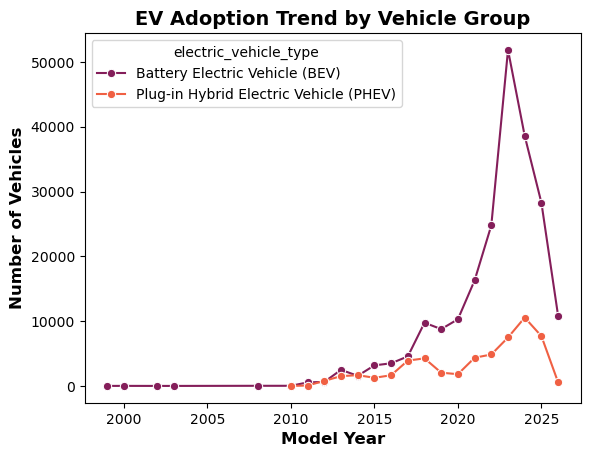

In [15]:
sns.lineplot(data=year_evtype,x='model_year',y='count',hue='electric_vehicle_type',marker='o',palette='rocket')
plt.title('EV Adoption Trend by Vehicle Group',fontsize=14,fontweight='bold')
plt.xlabel('Model Year',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Vehicles',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- Pre-2010: EV adoption is minimal and limited to BEVs only.
- 2010–2016: PHEVs appear and grow alongside BEVs, indicating a transition phase.
- Post-2017 (especially after 2020): BEV adoption accelerates sharply, exceeding 50,000 registrations, while PHEVs grow slowly and remain under 10,000.
- Overall trend shows a strong market shift toward fully electric vehicles (BEVs) over hybrids.

## Manufacturer Dominance over the years

In [16]:
evdf['make_group']=evdf['make'].apply(lambda x : x if x in ['TESLA','CHEVROLET','NISSAN'] else 'OTHERS')

In [17]:
year_make=evdf.groupby(['model_year','make_group']).size().reset_index(name='count')

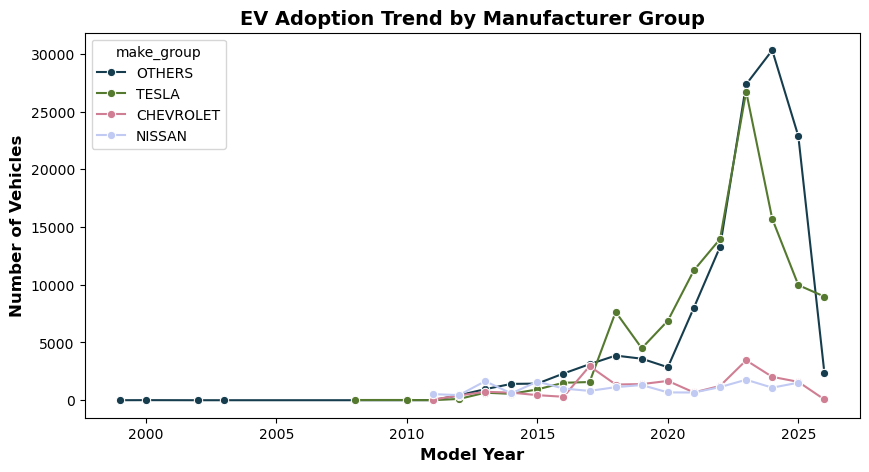

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=year_make,x='model_year',y='count',hue='make_group',marker='o',palette='cubehelix')
plt.title('EV Adoption Trend by Manufacturer Group',fontsize=14,fontweight='bold')
plt.xlabel('Model Year',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Vehicles',fontsize=12,fontweight='semibold')

plt.show()

## Insights :
- Post-2017, Tesla emerges as the single most dominant manufacturer, showing a sharp rise in registrations compared to any other individual brand.
- Chevrolet and Nissan contribute steadily but remain far behind Tesla, indicating weaker competitive pressure at the individual-manufacturer level.
- When manufacturers are aggregated as “Others”, their combined volume exceeds Tesla, highlighting a fragmented long-tail market rather than a single strong challenger.
- Overall, the market shows individual dominance by Tesla alongside collective dominance by multiple smaller manufacturers.

# Q. Which Manufacturers dominate EV registrations?

In [19]:
top_makes=evdf['make'].value_counts().head(10).reset_index()
top_makes.columns=['make','counts']

In [20]:
top_makes

,make,counts
0,TESLA,111049
1,CHEVROLET,19032
2,NISSAN,15963
3,FORD,14819
4,KIA,13470
5,TOYOTA,11159
6,BMW,11036
7,HYUNDAI,9651
8,RIVIAN,8475
9,VOLKSWAGEN,7358


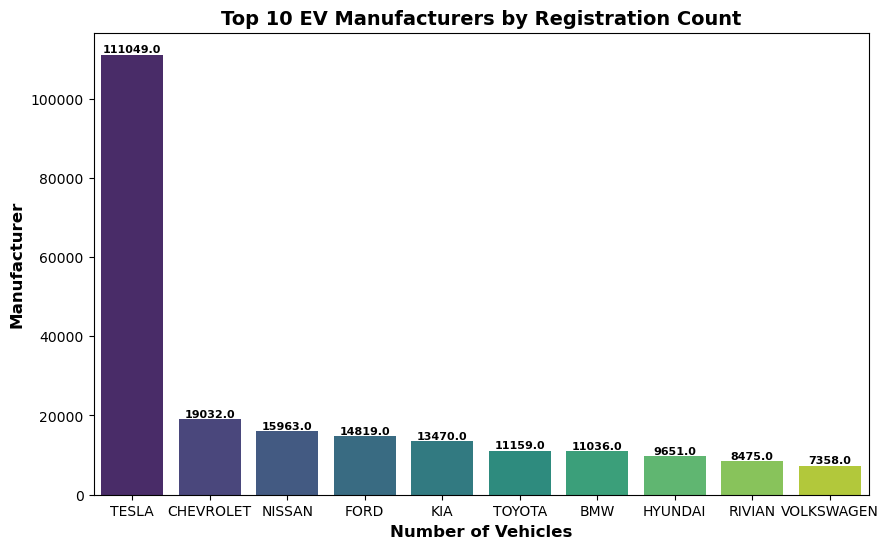

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_makes,
    x='make',
    y='counts',
    palette='viridis'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Top 10 EV Manufacturers by Registration Count',fontsize=14,fontweight='bold')
plt.xlabel('Number of Vehicles',fontsize=12,fontweight='semibold')
plt.ylabel('Manufacturer',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- Tesla overwhelmingly dominates EV registrations, with a count far exceeding all other manufacturers, indicating clear market leadership.
- Chevrolet and Nissan form a distant second tier, showing meaningful but significantly lower adoption compared to Tesla.
- The remaining manufacturers contribute smaller, relatively similar volumes, reflecting a fragmented competitive landscape beyond the market leader.

## Model Dominanace (Top 10 Models)

In [22]:
top_models=evdf['model'].value_counts().head(10).reset_index()
top_models.columns=['models','counts']

In [23]:
top_models

,models,counts
0,MODEL Y,57335
1,MODEL 3,37413
2,LEAF,13503
3,MODEL S,7758
4,BOLT EV,7708
5,MODEL X,6747
6,MUSTANG MACH-E,6155
7,ID.4,5958
8,IONIQ 5,5490
9,WRANGLER,4949


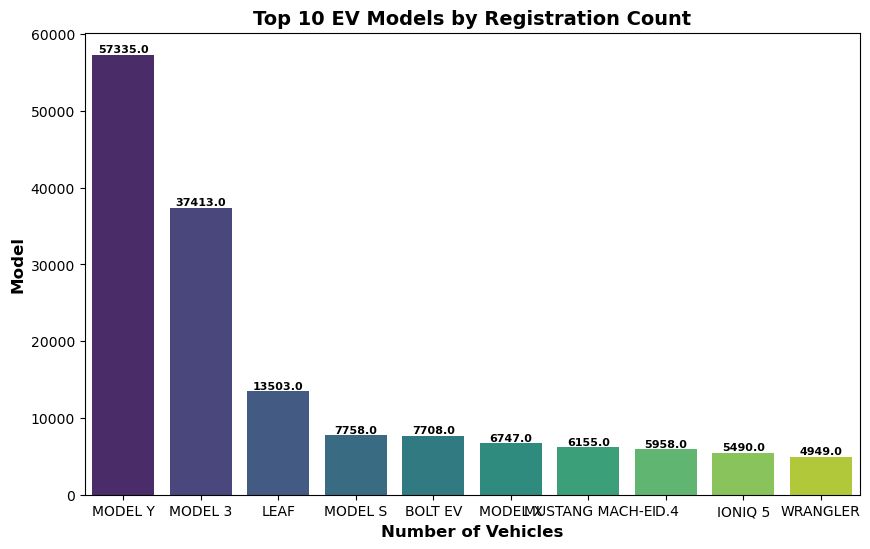

In [24]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_models,
    x='models',
    y='counts',
    palette='viridis'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Top 10 EV Models by Registration Count',fontsize=14,fontweight='bold')
plt.xlabel('Number of Vehicles',fontsize=12,fontweight='semibold')
plt.ylabel('Model',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- Tesla models dominate the EV landscape, with Model Y and Model 3 alone accounting for a substantial share of total registrations.
- Non-Tesla models trail by a wide margin, led by Nissan Leaf and Chevrolet Bolt EV, indicating limited model-level competition.
- EV adoption is highly concentrated around a small number of proven models, rather than evenly distributed across offerings.

## Country Level EV Adoption

In [25]:
country_counts=evdf['country'].value_counts().head(10).reset_index()
country_counts.columns=['country','ev_counts']

In [26]:
country_counts

,country,ev_counts
0,King,133903
1,Snohomish,33531
2,Pierce,22213
3,Clark,16553
4,Thurston,9852
5,Kitsap,9057
6,Spokane,7593
7,Whatcom,6620
8,Benton,3792
9,Skagit,3166


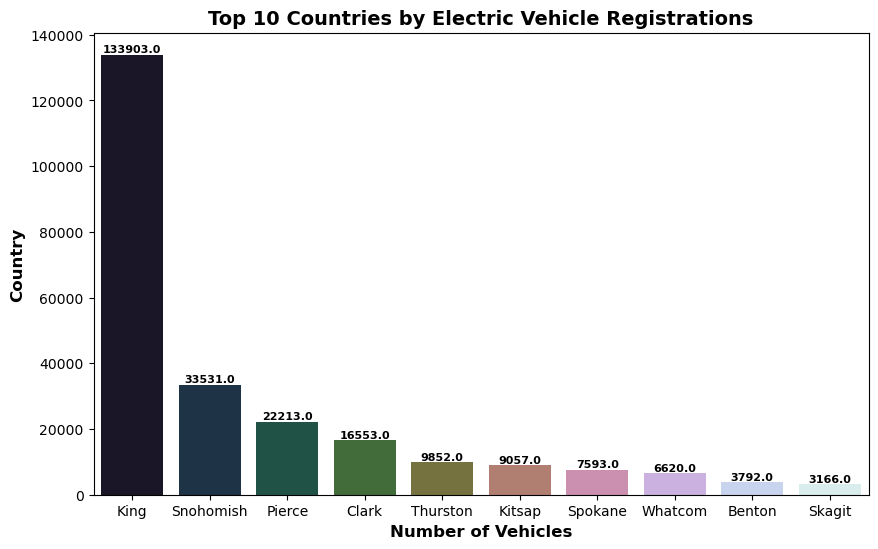

In [27]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=country_counts,
    x='country',
    y='ev_counts',
    palette='cubehelix'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Top 10 Countries by Electric Vehicle Registrations',fontsize=14,fontweight='bold')
plt.xlabel('Number of Vehicles',fontsize=12,fontweight='semibold')
plt.ylabel('Country',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- King County overwhelmingly leads EV adoption, with registrations far exceeding all other counties, highlighting strong urban concentration.
- Snohomish and Pierce form a distant second tier, indicating regional spillover from the Seattle metropolitan area.
- The sharp drop after the top counties shows that EV adoption is highly uneven geographically, concentrated in a few urbanized regions rather than statewide.

### King Country vs All Other Countries

In [28]:
evdf['country_group']=evdf['country'].apply(lambda x: 'King Country' if x=='King' else 'Other Countries')

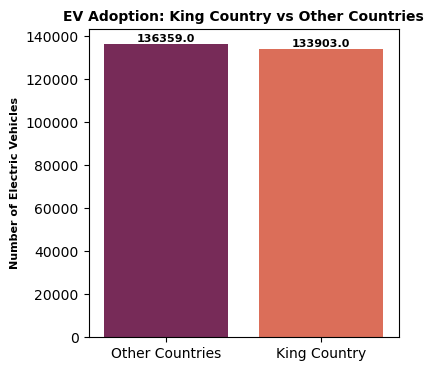

In [29]:
plt.figure(figsize=(4,4))
ax= sns.countplot(data=evdf,x='country_group',palette='rocket')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('EV Adoption: King Country vs Other Countries',fontsize=10,fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Electric Vehicles',fontsize=8,fontweight='semibold')

plt.show()    

## Insights: 
- King County alone accounts for nearly half of all EV registrations, underscoring its role as the primary EV adoption hub.
- Other counties collectively slightly exceed King County, indicating that while EV adoption is fragmented outside King County, no single county rivals its dominance.
- This contrast highlights a pattern of individual urban dominance versus collective regional contribution.

## City Level Dominance

In [30]:
city_counts=evdf['city'].value_counts().head(10).reset_index()
city_counts.columns=['city','ev_counts']

In [31]:
city_counts

,city,ev_counts
0,Seattle,42125
1,Bellevue,13203
2,Vancouver,10047
3,Redmond,9321
4,Bothell,8908
5,Kirkland,7677
6,Sammamish,7551
7,Renton,7423
8,Olympia,6325
9,Tacoma,5929


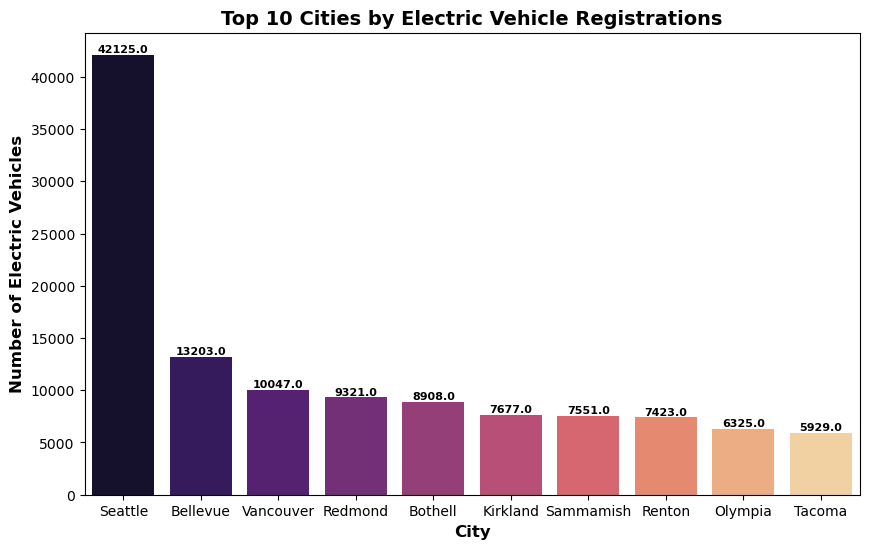

In [32]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=city_counts,
    x='city',
    y='ev_counts',
    palette='magma'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Top 10 Cities by Electric Vehicle Registrations',fontsize=14,fontweight='bold')
plt.xlabel('City',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Electric Vehicles',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- Seattle clearly dominates city-level EV adoption, with registrations far exceeding any other city, confirming a strong urban concentration effect.
- Bellevue and Vancouver follow at a significant distance, reflecting EV adoption clustered around major tech and suburban hubs.
- The distribution shows that EV uptake is driven by a small number of urban and affluent cities, rather than being evenly spread across all cities.

# CAFV Eligibility Distribution

In [33]:
cafv_counts=evdf['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts().reset_index()
cafv_counts.columns=['clean_alternative_fuel_vehicle_(cafv)_eligibility','ev_counts']

In [34]:
cafv_counts

,clean_alternative_fuel_vehicle_(cafv)_eligibility,ev_counts
0,Eligibility unknown as battery range has not b...,169872
1,Clean Alternative Fuel Vehicle Eligible,76360
2,Not eligible due to low battery range,24030


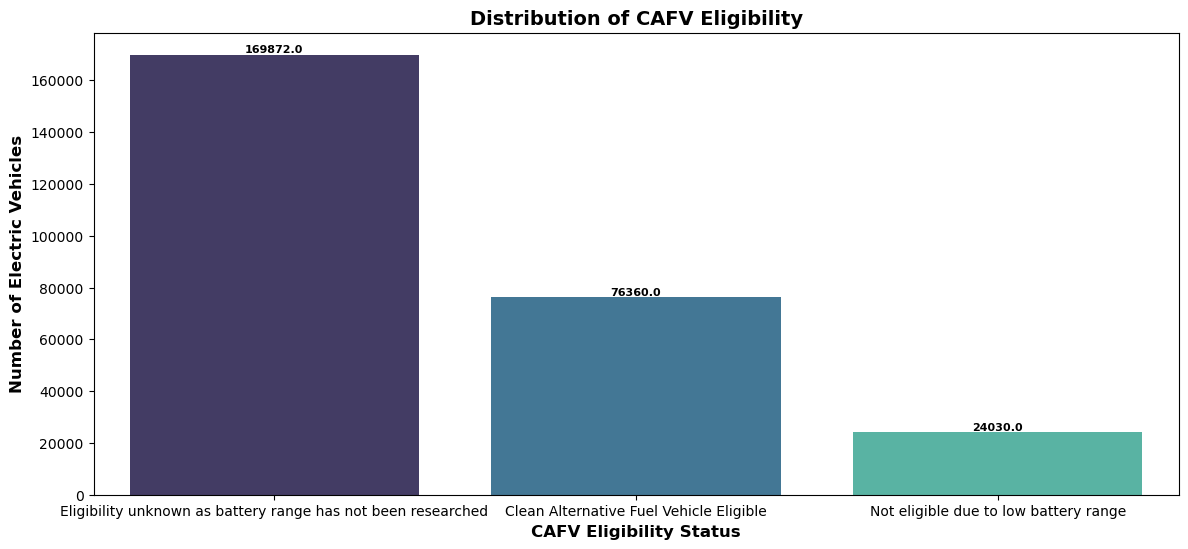

In [35]:
plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=cafv_counts,
    x='clean_alternative_fuel_vehicle_(cafv)_eligibility',
    y='ev_counts',
    palette='mako'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Distribution of CAFV Eligibility',fontsize=14,fontweight='bold')
plt.xlabel('CAFV Eligibility Status',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Electric Vehicles',fontsize=12,fontweight='semibold')

plt.show()

## Insights:
- A large proportion of vehicles have unknown CAFV eligibility, primarily due to missing or unreported battery range data.
- CAFV-eligible vehicles form a substantial but smaller share, indicating meaningful alignment with clean fuel incentive policies.
- Ineligible vehicles represent the minority, suggesting that most EVs are either policy-aligned or limited by reporting rather than technology.

# EV Type vs CAFV Eligibility

In [36]:
ev_cafv=evdf.groupby(['electric_vehicle_type','clean_alternative_fuel_vehicle_(cafv)_eligibility']).size().reset_index(name='count')

In [37]:
ev_cafv

,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,count
0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,45979
1,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,169872
2,Battery Electric Vehicle (BEV),Not eligible due to low battery range,8
3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30381
4,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,24022


In [38]:
pivot_ev_cafv=ev_cafv.pivot(index='electric_vehicle_type',columns='clean_alternative_fuel_vehicle_(cafv)_eligibility',values='count').fillna(0)

In [39]:
pivot_ev_cafv

clean_alternative_fuel_vehicle_(cafv)_eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
electric_vehicle_type,,,
Battery Electric Vehicle (BEV),45979.0,169872.0,8.0
Plug-in Hybrid Electric Vehicle (PHEV),30381.0,0.0,24022.0


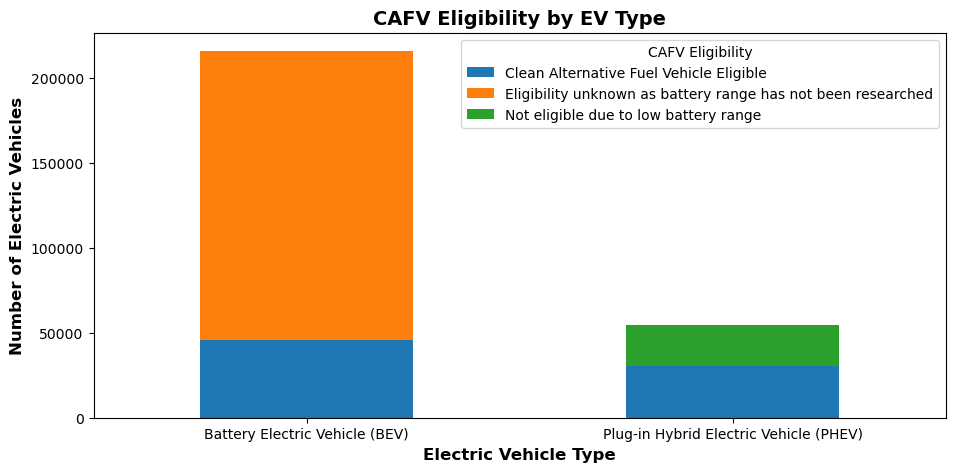

In [40]:
pivot_ev_cafv.plot(kind='bar',stacked=True,figsize=(11,5))
plt.title('CAFV Eligibility by EV Type',fontsize=14,fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Electric Vehicle Type',fontsize=12,fontweight='semibold')
plt.ylabel('Number of Electric Vehicles',fontsize=12,fontweight='semibold')
plt.legend(title='CAFV Eligibility')
plt.show()

## Insights:
- BEVs are predominantly CAFV-eligible, with a large number reported as eligible, highlighting strong alignment with clean fuel policies.
- PHEVs show a more mixed picture, with roughly equal numbers eligible and ineligible, reflecting transitional technology and policy constraints.
- The high number of unknown eligibility for BEVs underscores reporting gaps rather than technological limitations.

# Do BEVs and PHEVs differ in reported electric range?

In [41]:
evdf['electric_range'].isna().sum()

np.int64(5)

### Creating a Reporting Flag

In [42]:
evdf['range_reported']=evdf['electric_range']>0

- True: Reported Range
- False: Missing/Unreported

In [43]:
evdf['range_reported'].isna().sum()

np.int64(0)

In [44]:
evdf['range_reported'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 270262 entries, 0 to 270261
Series name: range_reported
Non-Null Count   Dtype
--------------   -----
270262 non-null  bool 
dtypes: bool(1)
memory usage: 264.1 KB


# Electric Range vs EV Type

In [45]:
range_df=evdf[evdf['electric_range']>0]

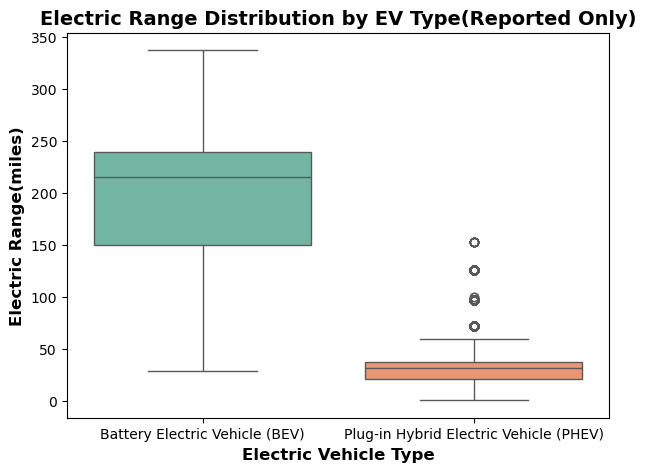

In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(data=range_df,x='electric_vehicle_type',y='electric_range',palette='Set2')
plt.title('Electric Range Distribution by EV Type(Reported Only)',fontsize=14,fontweight='bold')
plt.xlabel('Electric Vehicle Type',fontsize=12,fontweight='semibold')
plt.ylabel('Electric Range(miles)',fontsize=12,fontweight='semibold')

plt.show()

# Electric Range vs Model Year (Reporting Quality)
# Is Reporting Improving Over time?

In [47]:
yearly_range=evdf.groupby('model_year').agg(avg_range=('electric_range','mean'),
                                           reported_ratio=('range_reported','mean')).reset_index()

In [48]:
yearly_range

,model_year,avg_range,reported_ratio
0,1999,74.000000,1.000000
1,2000,58.000000,1.000000
2,2002,95.000000,1.000000
3,2003,95.000000,1.000000
4,2008,209.000000,0.950000
5,2010,232.391304,1.000000
6,2011,71.434494,1.000000
7,2012,59.727532,1.000000
8,2013,78.468288,1.000000
9,2014,78.598200,1.000000


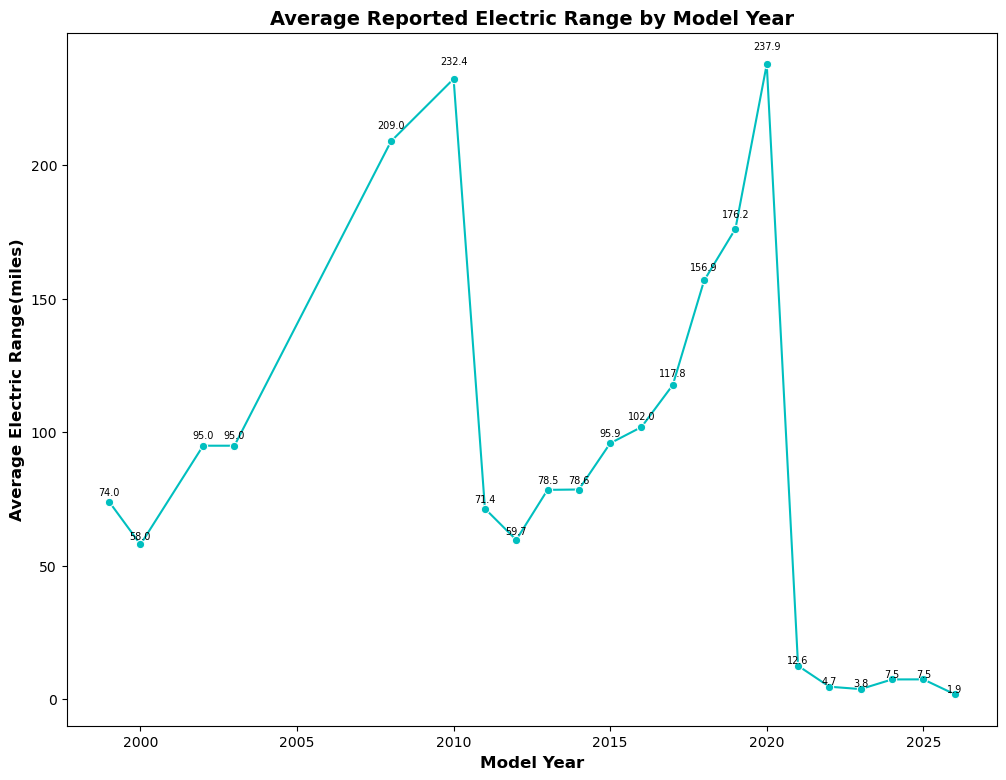

In [49]:
plt.figure(figsize=(12,9))
sns.lineplot(data=yearly_range,x='model_year',y='avg_range',marker='o',palette='flare',color='c')
plt.title('Average Reported Electric Range by Model Year',fontsize=14,fontweight='bold')
plt.xlabel('Model Year',fontsize=12,fontweight='semibold')
plt.ylabel('Average Electric Range(miles)',fontsize=12,fontweight='semibold')
for x, y in zip(yearly_range['model_year'], yearly_range['avg_range']):
    plt.text(
        x, y*1.02,
        f'{y:.1f}',
        ha='center',
        va='bottom',
        fontsize=7
    )

plt.show()

## Insights:
- Average electric range trends upward until 2020 for BEVs, then becomes unreliable afterward, highlighting that post-2020 data should be interpreted with caution.

# Reporting Completeness Over Time

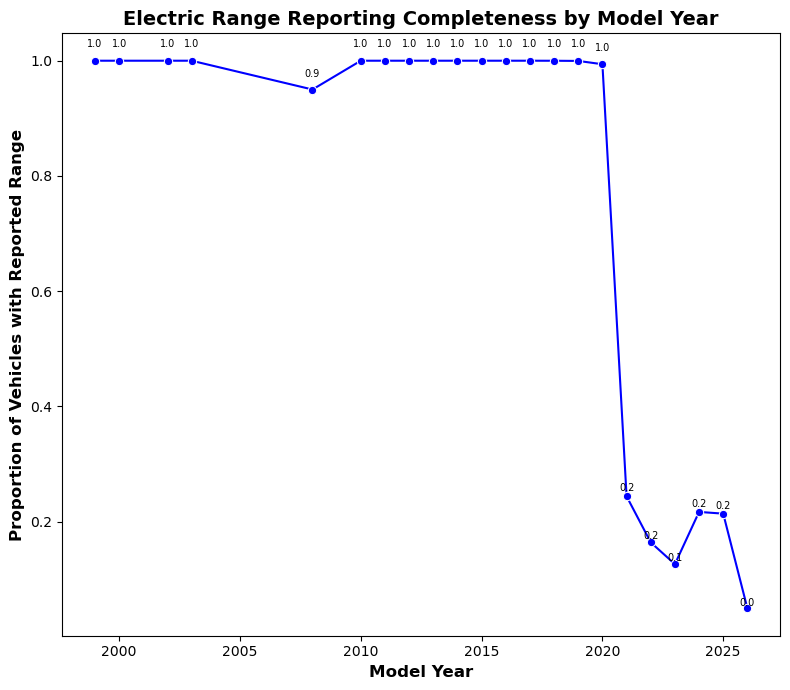

In [50]:
plt.figure(figsize=(8,7))
sns.lineplot(data=yearly_range,x='model_year',y='reported_ratio',marker='o',palette='flare',color='b')
plt.title('Electric Range Reporting Completeness by Model Year',fontsize=14,fontweight='bold')
plt.xlabel('Model Year',fontsize=12,fontweight='semibold')
plt.ylabel('Proportion of Vehicles with Reported Range',fontsize=12,fontweight='semibold')
for x, y in zip(yearly_range['model_year'], yearly_range['reported_ratio']):
    plt.text(
        x, y*1.02,
        f'{y:.1f}',
        ha='center',
        va='bottom',
        fontsize=7
    )
plt.tight_layout()
plt.show()

## Insights:
- Reporting quality is near-perfect (≈100%) from 1999 to 2020, indicating reliable electric range data in earlier model years.
- Post-2020, reporting drops sharply, with less than 25% of vehicles reporting range, likely due to incomplete or delayed data submission.

# Key Findings & Conclusions
- Adoption Trends: EV adoption accelerated post-2017, driven mainly by BEVs. PHEVs grew more modestly, reflecting a transitional adoption path.
- Manufacturer Dominance: Tesla is the single most dominant manufacturer, particularly in BEVs, while Chevrolet, Nissan, and others occupy a smaller share individually; collectively, smaller brands maintain a fragmented but significant market presence.
- Model Dominance: Tesla models (Model Y and Model 3) account for the largest share of EV registrations, showing high concentration around a few popular models.
- Geographic Patterns: King County alone accounts for nearly half of EV registrations, with Seattle as the primary city-level hub; other counties and cities show significantly lower adoption.
- Policy Insights: BEVs are largely CAFV-eligible, while PHEVs show mixed eligibility. A substantial portion of BEV records have unknown eligibility, reflecting reporting gaps rather than technology limits.
- Electric Range Reporting: Reporting quality is excellent up to 2020 but declines sharply post-2020, indicating incomplete data for recent model years. Average reported range for BEVs shows steady improvement until 2020.
# Overall Conclusion:
The Washington State EV market is dominated by BEVs, Tesla, and urban hubs like Seattle, with clear signals that policy incentives and infrastructure support drive adoption. Data completeness and reporting quality remain important considerations for interpreting trends in recent years.